# Assignments Week IV.<br><br>Complex Exponents and Fourier Series
<hr style="height:1px; border:none; background-color:blue;">

### Useful Information

**In this notebook you will be working on the mandatory assignments for week four of Signal Processing**. In order to complete the notebook you must complete all of the necessary code blocks (labelled with "Write your code here"), and fill in all answer blocks. Each section of the notebook will state the completion criteria, which summarize everything you need to do to complete that section. **If you are stuck on a section in this notebook, it may be beneficial to check the non-mandatory exercises for this week, since they may have content that can help you!**

Mandatory assignments are pass or fail. **If your notebook is incomplete - meaning you did not complete the task required or answer the necessary questions - then you will automatically fail.** So once you finish this notebook, please look through it to make sure you've answered everything!

<hr style="height:1px; border:none; background-color:blue;">

### Objectives
- Find amplitudes and phases of harmonic signals.
- Work with signals as complex exponentials.
- Find and plot the spectra.
- Compute Fourier coefficients and write a signal as a sum of complex exponentials.

<hr style="height:3px; border:none; background-color:blue;">

<h3 style="color:blue;"> <u>Imports for Exercises and Assignments </u></h3> 

Run the code below to import modules that will be used throughout the rest of this notebook.

<br>

In [2]:
##########################################################################################
# Import various modules into PYTHON. These will be used throughput this Jupyter Notebook
##########################################################################################
# import matplotlib for data visualisation
import matplotlib.pyplot as plt

# import NumPy for better matrix support
import numpy as np

# import Pickle for data serialisation
import pickle as pkl

# import wav for reading files
from scipy.io import wavfile as wv

# import audio for playing audio
from IPython.display import Audio, display

# add path for importing modules to './data'. 
import sys
sys.path.insert(0, './data')

############################################################################
#
# function for easy plotting of signals with centered axis and lager figure
#
#   nicesignalplot(scale,values,caption)
#      scale:   array with vertical scale values 't' (float)
#      values:  array with signal values 'x(t)' to plot (float or complex, 
#               in latter case .real will be used)
#      caption: caption of the plot (string)
#
############################################################################
def nicesignalplot(scale,values,caption):
    myfigure  =  plt.figure(figsize=(15,7.5))
    ax        = myfigure.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot( scale, values)
    plt.title('(nicesignalplot): '+caption)
    plt.show()

<!---PYTHON ASSIGNMENT IV.1 ---------------------------------------------------------------------->

<div>  
<h3 style="color:blue;"> <u> Python Hands-on Assignment IV.1: Complex exponents</u></h3>  
    
<br>
<div style="background-color:#c2eafa">
    <br>
    <b>Completion requirements for this assignment.</b>
    <ul>
        <li>Show the magnitude and phase plots of the signal $y(t)$. Give the frequencies of the harmonics.</li>
        <li>Show the magnitude and phase plots of the signal $y[n]$. Give the frequencies of the harmonics.</li>
        <li>Show the plots of $y[n]$ resulting from direct implementation and from the rewritten cosine signals, and compare them.</li>
        <li>Explain the effects of the different phase shifts $\pi/4$, $0.690$, $4\pi$ and $-9\pi/4$ in one sentence per case.</li>
    </ul>
    <hr>
</div>

We consider the time-continuous signal:

\begin{equation}
    y(t) = 3 + e^{j2000t} + e^{-j2000t} - e^{j(7000t + \pi / 3)} - e^{-j(7000t + \pi / 3)}.
\end{equation}

**Visualize the time-continuous signal $y(t)$ for a sufficiently large number of periods.**
    
<i>Note: You can make us of the code fragments presented in the Exercises for Week IV.</i>

</div>
<br>

/home/anon/Programming/tud/cse2220-signal-processing/venv/lib64/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/anon/Programming/tud/cse2220-signal-processing/venv/lib64/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


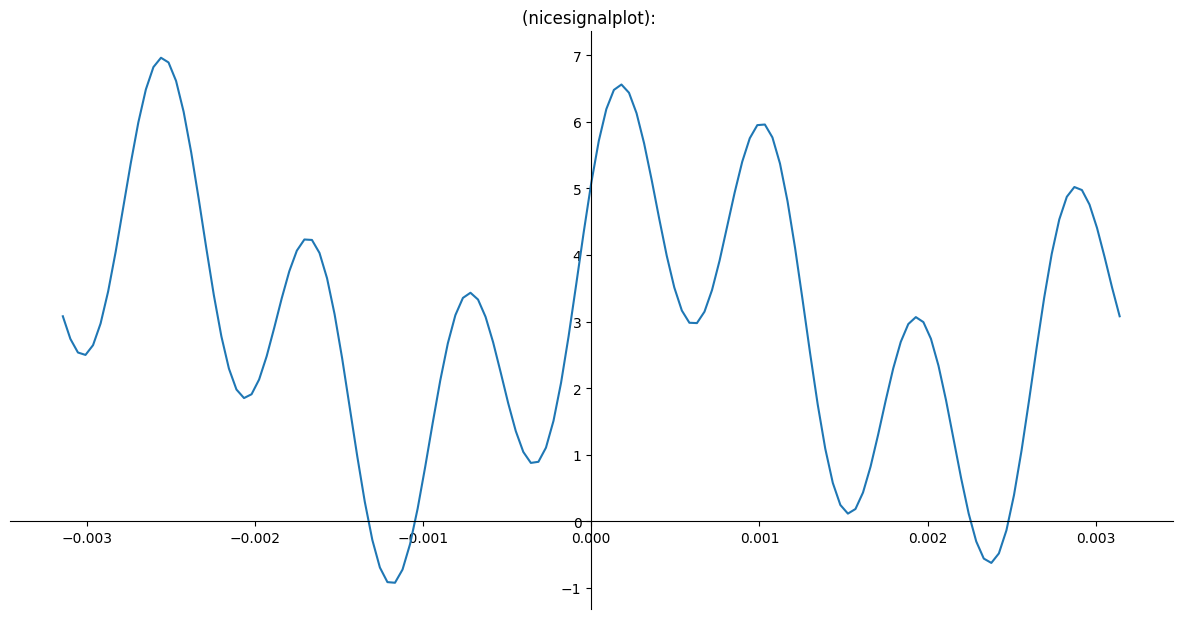

In [3]:
def spectrum2signal(T,fs,cspec): # copied from seminar
    nsamples = int(2*T*fs+1)
    sampletime = np.arange( -(1/fs)*(nsamples-1)/2 , (1/fs)*nsamples/2 , 1/fs) 
    signal = np.zeros(nsamples,dtype=complex)

    for c in range( 0,len(cspec) ):
        signal +=  cspec[c][1]*np.exp(1j * 2*np.pi*cspec[c][0] * sampletime)

    if np.var(signal.imag) > 1e-8: 
        print('(spectrum2signal) Warning: created signal has large non-zero imaginary parts.' )    
        
    return (sampletime,signal)

omega_fund = np.gcd(2_000, 7_000) # proper frequencies non-integer, use angular
cap_t_fund = 2 * np.pi / omega_fund

f_0 = 7_000 / (2 * np.pi)
f_1 = 2_000 / (2 * np.pi)

# The time-frame is so small, that we need a significntly higher f_s to get a
# continuous-looking plot.
f_s = (20 * f_0)

# spectrum2signal plots [-T, T] so 1/2 for 1 period
# TODO: why can't I use non-np.exp
num_of_periods = 1
(st, xx) = spectrum2signal(num_of_periods * cap_t_fund / 2, f_s, np.array([
    [-f_0, np.exp(1j * np.pi / 3)],
    [-f_1, np.exp(1j)],
    [0, 3],
    [f_0, np.exp(-1j * np.pi / 3)],
    [f_1, np.exp(-1j)],
]))
nicesignalplot(st, xx, "")

<br>

Next, determine (by hand) the magnitude and phase of the harmonics. In the code block below, **create a variable that contains the complex spectrum of the given signal. Plot the magnitude and phase spectra plot of the signal $y(t)$.** Verify that the magnitude and phase plots are correct by manually calculating them.

<i>Note: As before, you can make us of the code fragments presented in the Exercises for Week IV to help you.</i>

<br>

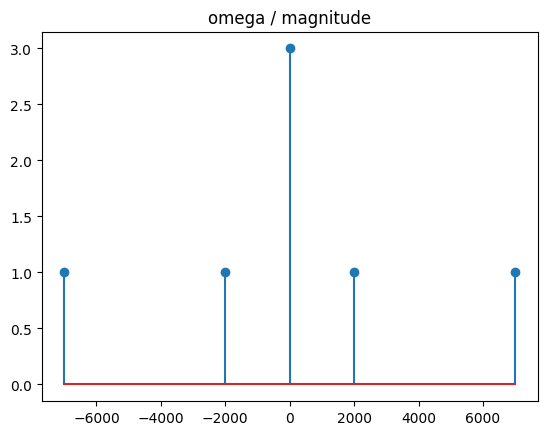

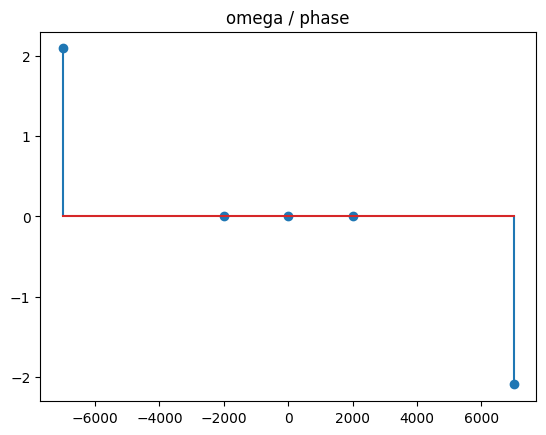

In [4]:
# for omega=+-7000: -cos shifted by -pi
spec_wrt_omega = {
  -7000: np.exp(1j * 2 * np.pi / 3),
  -2000: 1,
  0: 3 * np.exp(1j * 0),
  2000: 1,
  7000: np.exp(-1j * 2 * np.pi / 3),
}

# group column-wise
xs, ys = zip(*spec_wrt_omega.items())

plt.stem(xs, np.abs(ys))
plt.title("omega / magnitude")
plt.show()

plt.stem(xs, np.angle(ys))
plt.title("omega / phase")
plt.show()










<br>

**What are the frequencies of the harmonics of the given signal?**

<br>

<div class="alert alert-block alert-success">
    0 Hz; 
    2000/(2π) ≈ 318.31 Hz; 
    7000/(2π) ≈ 1114.08 Hz; 
</div>

<br>

**Create the following signal in a vector of length 128 (for instance for $y[0] \cdots y[127]$ or for $y[-63] \cdots y[64]$ ):**

\begin{equation}
     y[n] = 3 + e^{j0.2 \pi n} + e^{-j0.2 \pi n} - e^{j(0.7 \pi n + \pi / 3)} - e^{-j(0.7 \pi n + \pi / 3)}
\end{equation}

**Plot the signal using `plt.stem`, and try to see if you can recognize the two harmonics in the signal.** As we have seen before, the signal $y[n]$ should be real-valued, but the limitations of the numerical accuracy may yield very small imaginary components in $y[n]$. These can be ignored in the assignment by plotting the `.real` values of $y[n]$. 

<br>

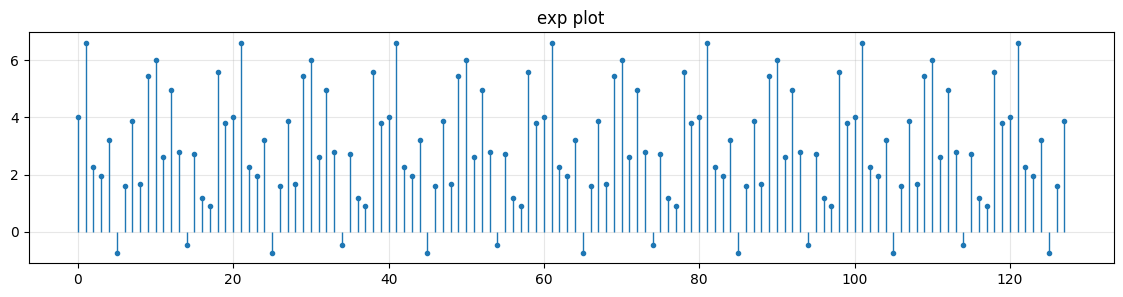

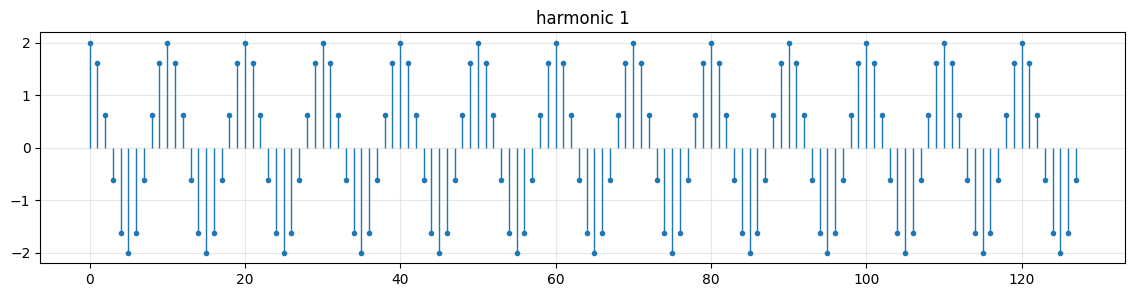

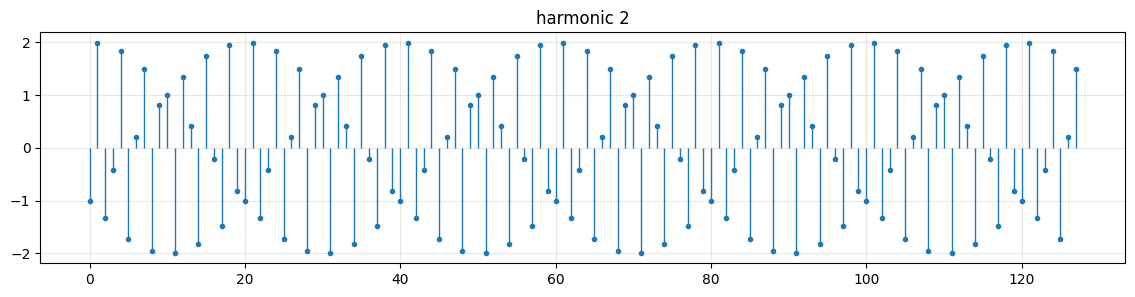

In [5]:
def prepare_pretty_plot(x, y, title):
    plt.figure(figsize=(14, 3))
    markerline, stemlines, _ = plt.stem(x, y, basefmt=' ')
    plt.setp(stemlines, linewidth=1)
    plt.setp(markerline, markersize=3)
    plt.grid(alpha=0.3)
    plt.title(title)
    plt.show()

n = np.arange(0, 128)
y_n = 3 \
    + np.exp(1j * 0.2 * np.pi * n) \
    + np.exp(-1j * 0.2 * np.pi * n) \
    - np.exp(1j * (0.7 * np.pi * n + np.pi / 3)) \
    - np.exp(-1j * (0.7 * np.pi * n + np.pi / 3))
prepare_pretty_plot(n, y_n.real, "exp plot")

harmonic_1 = np.exp(1j * 0.2 * np.pi * n) + np.exp(-1j * 0.2 * np.pi * n)
harmonic_2 = -np.exp(1j * (0.7 * np.pi * n + np.pi / 3)) - np.exp(-1j * (0.7 * np.pi * n + np.pi / 3)) # -cos shifted by -pi
prepare_pretty_plot(n, harmonic_1.real, "harmonic 1")
prepare_pretty_plot(n, harmonic_2.real, "harmonic 2")

<br>

**Rewrite by hand the expression for $y[n]$ as a sum of cosine signals.** Create a variable containing the signal as a sum of cosines, and **plot the signal.**

<br>

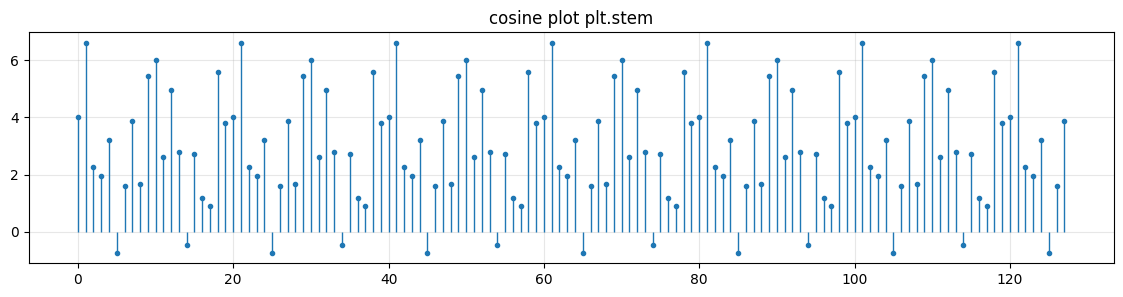

In [6]:
n = np.arange(0, 128)
y_n = 3 * np.cos(0) + 2 * np.cos(0.2 * np.pi * n) - 2 * np.cos(0.7 * np.pi * n + np.pi / 3)
prepare_pretty_plot(n, y_n, "cosine plot plt.stem")

<br>

Compare the plot that uses sum of cosines to the plot that uses complex exponentials. **Are the two plotted signals the same?**

<br>

<div class="alert alert-block alert-success">
    The same.
</div>

<br>

Take one of the two result for $y[n]$ from your previous code. **Apply the following phase shifts $\phi$ to the signal $y[n]$:**

\begin{align}
    \phi = & \frac{\pi}{4}, \\
    \phi = & 0.690, \\
    \phi = & 4 \pi, \\
    \phi = & -\frac{9 \pi}{ 4}.
\end{align}

**Plot the time domain signals.**

<br>

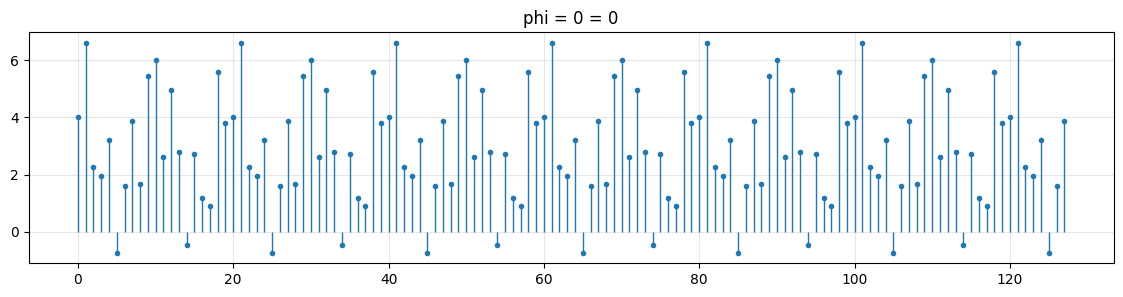

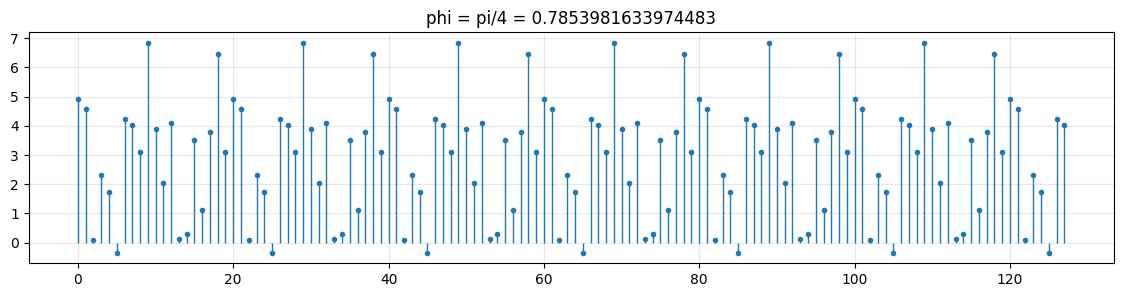

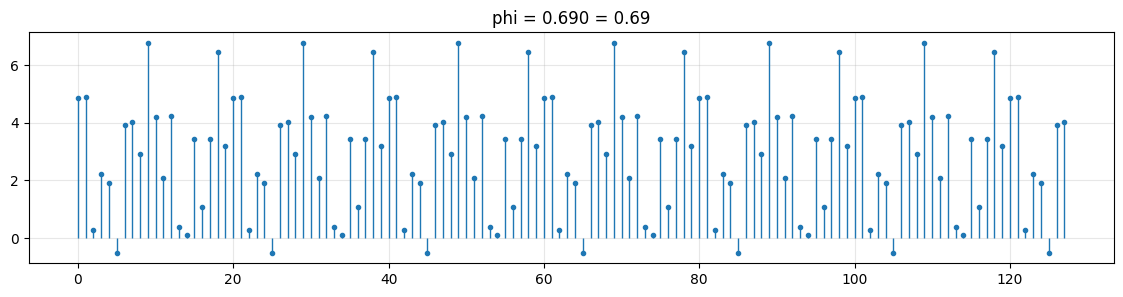

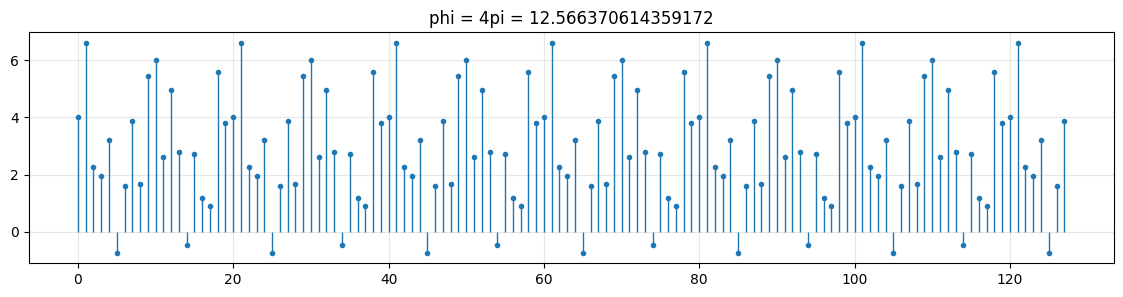

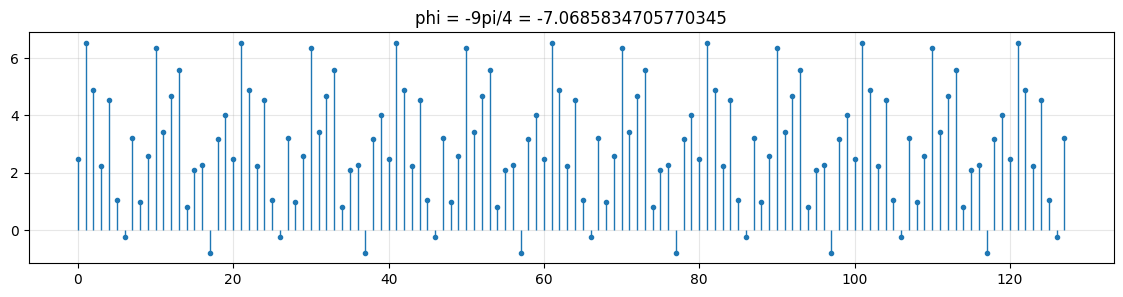

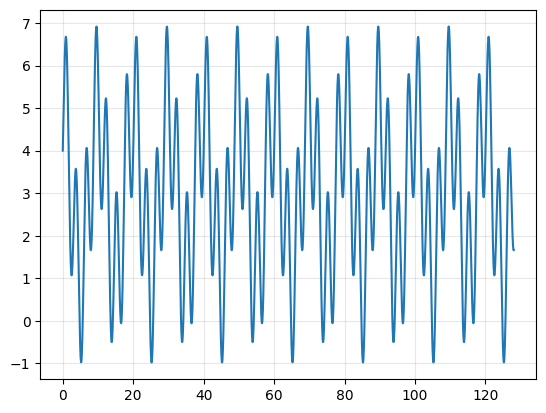

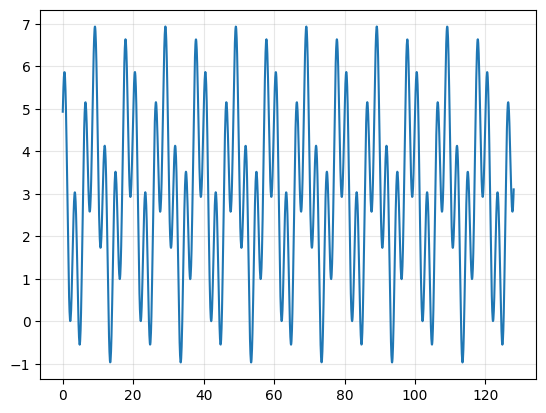

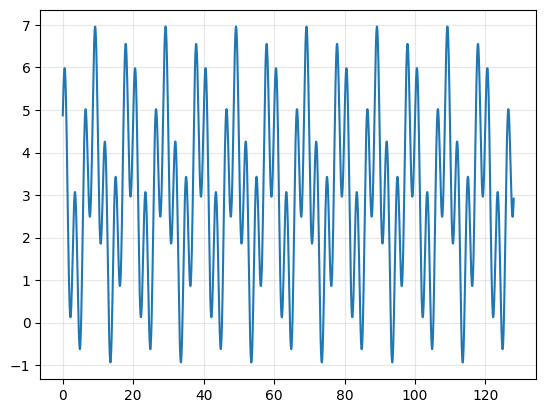

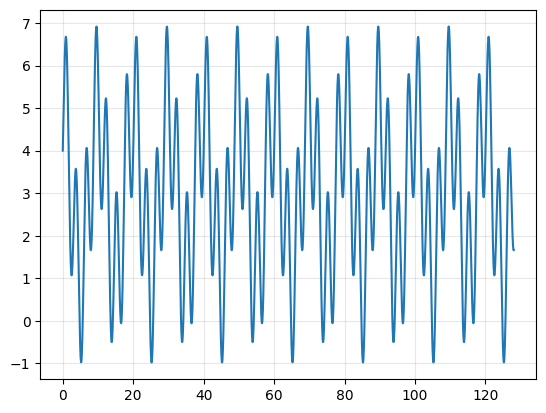

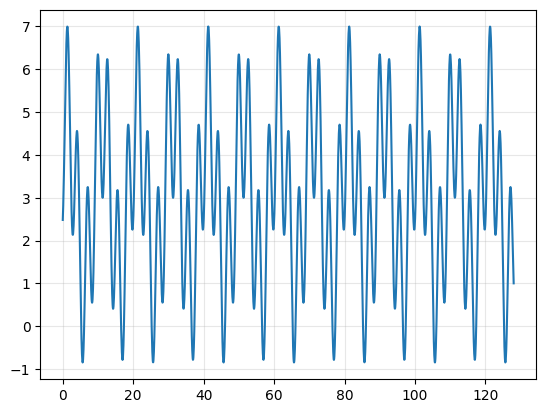

In [7]:
n = np.arange(0, 128)
y_n_phi_shifted = lambda phi: 3 + 2 * np.cos(0.2 * np.pi * n + phi) - 2 * np.cos(0.7 * np.pi * n + phi + np.pi / 3)
for name, phi in [("0", 0), ("pi/4", np.pi / 4), ("0.690", 0.690), ("4pi", 4 * np.pi), ("-9pi/4", -9 * np.pi / 4)]:
    prepare_pretty_plot(n, y_n_phi_shifted(phi), f"phi = {name} = {phi}")

n = np.linspace(0, 128, 2000)
y_n_phi_shifted = lambda phi: 3 + 2 * np.cos(0.2 * np.pi * n + phi) - 2 * np.cos(0.7 * np.pi * n + phi + np.pi / 3)
for name, phi in [("0", 0), ("pi/4", np.pi / 4), ("0.690", 0.690), ("4pi", 4 * np.pi), ("-9pi/4", -9 * np.pi / 4)]:
    plt.plot(n, y_n_phi_shifted(phi), f"")
    plt.grid(alpha=0.3)
    plt.show()

<br>

**Explain each of the plotted phase shifts using one sentence per plot. How does each of them relate to the original signal?**

<br>

<div class="alert alert-block alert-success">
    1. Shifts to the left by pi/4~=0.785 units. <br>
    2. Roughly same as 1, shifts to the left by 0.690.  <br>
    3. 4pi is one full cycle, no change in signal. <br>
    4. Shifts to the left by -pi/4. <br>
    <br>
    In all cases, the magnitude and the fundamental frequency remains the same!
    For plt.stem, we're plotting at an effective sampling frequency of 1. Therefore, we're only calculating y(n) at n integer, and when we shift n by a non-integer amount we introduce unseen values into the plot. Therefore, it looks like the underlying signal changes when it in fact is the same. This is further confirmed by the subsequent continuous plots over nyquist. <br>

</div>

<!---PYTHON ASSIGNMENT IV.2 ---------------------------------------------------------------------->

<div>  
<h3 style="color:blue;"> <u>Python Hands-on Assignment IV.2 Option A: Step counter</u></h3>  
    
<p style="color: #ee5353;"> For Assignment IV.2 there are two options: either option A or option B. <i>Only complete one of the options, not both.</i> </p>

<br>
<div style="background-color:#c2eafa">
    <br>
    <b>Completion requirements for this assignment.</b>
    <ul>
        <li> Create a program that can count the steps for some given walking data. </li>
        <li> Summarize the method you develop in this assignment using 5-10 sentences. Back up the summary using your code.</li>
    </ul>
    <hr>
</div>

We continue the example given in the class room lecture. The file `data/walkingdata.pkl` contains the result of the combined X-Y-Z accelerometers. The sensor data has been sampled at 9.5 Hz. It is known that after standing still for about 5 seconds, the person walks around for about 5 seconds. There is no information about the remaining time (approximately 50 seconds) for which the sensor data has been logged.
    
**Run the following code block to display the walking data.**
    
</div>
<br>

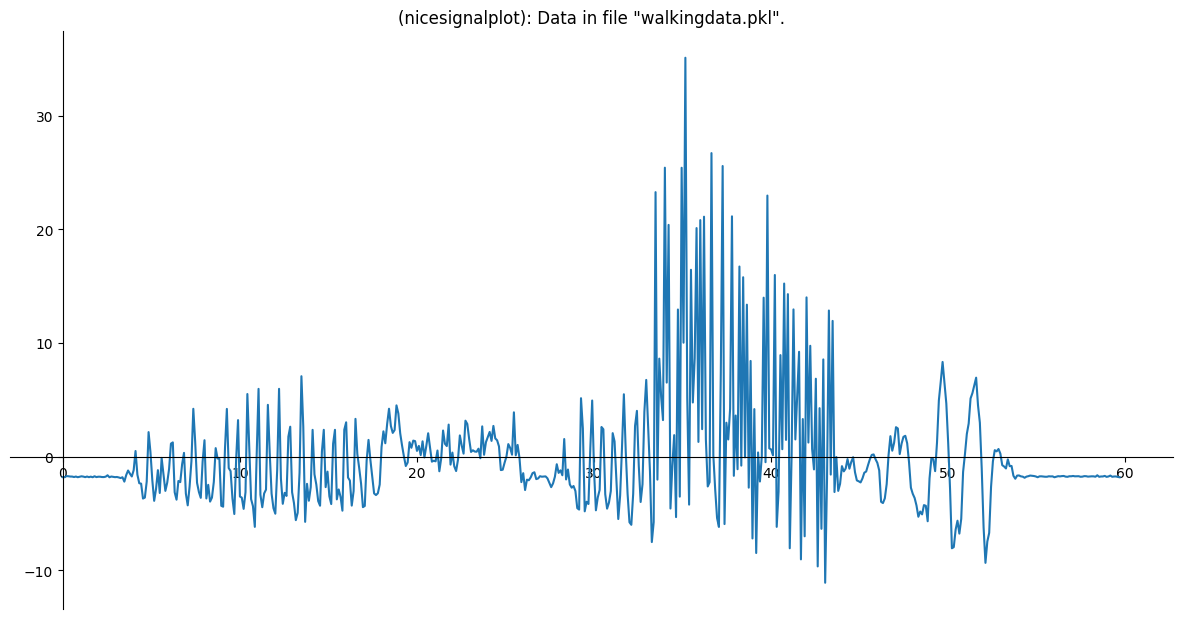

Note that the signal mean is  -1.1008408582198734e-15 Be careful reading the vertical axis.


In [8]:
wdata = np.load("data/walkingdata.pkl",allow_pickle=True)
fs    = 9.5
nicesignalplot(np.arange(0,len(wdata)/fs,1/fs),wdata,'Data in file "walkingdata.pkl".')

print('Note that the signal mean is ',np.mean(wdata), 'Be careful reading the vertical axis.')

<br>

**In the code block below, write a program that counts the number of steps in the given data.** As hints for developing the signal processing steps, we suggest the following.
<br>
<ul>
<li> The data is slightly degraded by noise. You can estimate the severity of the noise degradation by looking at the “standing still” period.</li>
<li> Signal peaks may be due to steps but also to other artifacts. Be careful not to count every peak as a step. Use some kind of threshold to determine which peaks are steps.</li>
<li> Use a linear filter to find a reasonable threshold for detecting steps.</li>
<li> It is known that a "perfect step" (see class room lecture) would result in the following (normalized) signal values: </li>
</ul> 

![PA.IV.2.png](graphics/PA.IV.2.png)

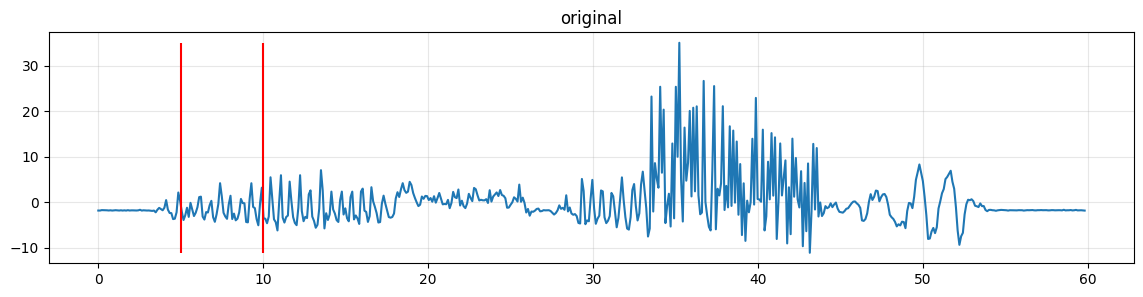

still_offset=np.float64(-1.728895112476235)


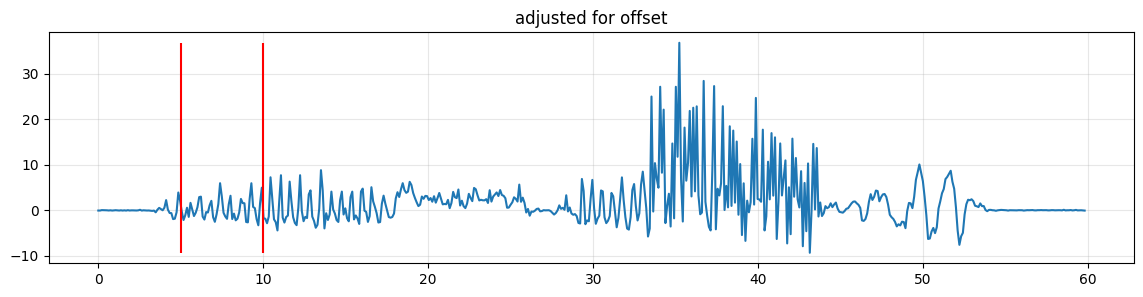

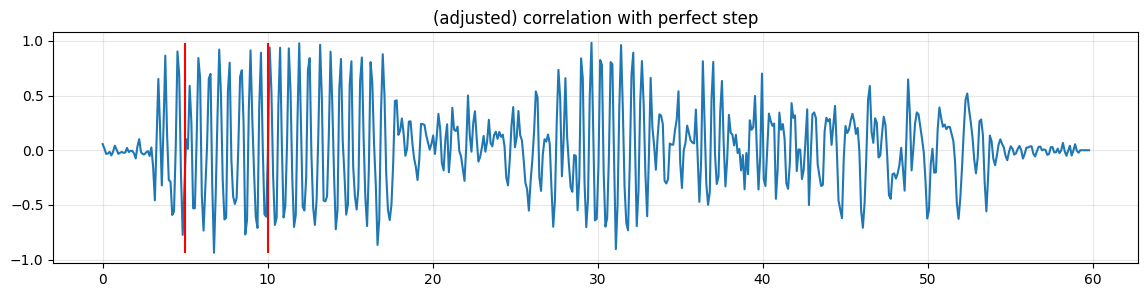

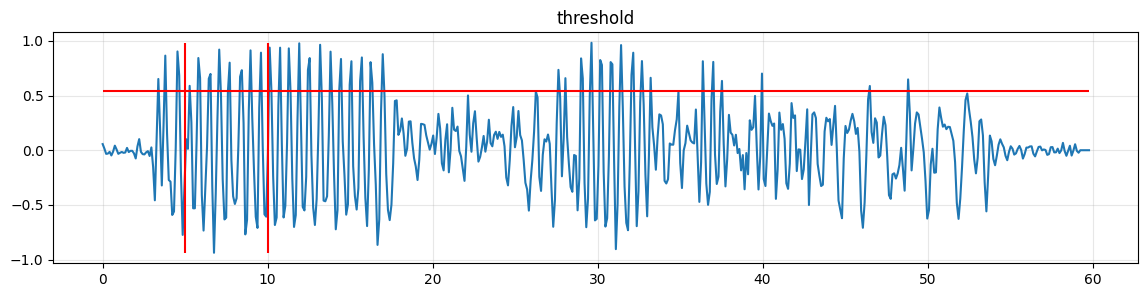

---
steps: 55


In [9]:
def prepare_pretty_plot(x, y, title):
    plt.figure(figsize=(14, 3))
    plt.plot(x, y)
    plt.grid(alpha=0.3)
    plt.title(title)
    plt.vlines(x=[5, 10], ymin=np.min(y), ymax=np.max(y), color="red")

wdata = np.load("data/walkingdata.pkl",allow_pickle=True)
fs = 9.5

# plot original
x = np.linspace(0, len(wdata)/fs, len(wdata))
prepare_pretty_plot(x, wdata, "original")
plt.show()

# adjust for standing still offset
num_samples_five_seconds = int(np.floor(5*fs))
still_offset = np.mean(wdata[:num_samples_five_seconds])
print(f"{still_offset=}")
wdata -= still_offset
prepare_pretty_plot(x, wdata, "adjusted for offset")
plt.show()

# normalize window size, correlate with perfect step
perfect_step = np.array([-0.3407, -0.3892, 0.1861, 1.0000, 0.1942, -0.3678])
perfect_step_norm = np.linalg.norm(perfect_step)
corrs = np.zeros(len(wdata))
for i in range(len(wdata) - len(perfect_step)):
    window = wdata[i:i+len(perfect_step)]
    adjusted_window_norm = max(1, np.linalg.norm(window)) # do not reward small norms
    cov = np.dot(window, perfect_step) # shape likeness
    corrs[i] = cov / (adjusted_window_norm * perfect_step_norm) # normalize 
prepare_pretty_plot(x, corrs, "(adjusted) correlation with perfect step")
plt.show()

# find threshold using movement window
movement_corrs = corrs[num_samples_five_seconds : 2*num_samples_five_seconds]
cap_n = 12 # including dupes
top_n = np.sort(movement_corrs)[-cap_n]
corr_thresh = np.mean(top_n)
prepare_pretty_plot(x,corrs, "threshold")
plt.hlines(y=corr_thresh, xmin=0, xmax=len(wdata)/fs, color="red")
plt.show()

# count steps
print("---")
steps = np.where(corrs > corr_thresh)
print(f"steps: {len(steps[0])}")

<br>

**Please provide a 5-10 sentence explanation about how your program works, and state your estimate of the number of steps.** You should use plots to support your explanation. For example, plotting the threshold you use to determine which peaks are steps will make it easier to see how you got your estimate.

<br>

<div class="alert alert-block alert-success">
    Code is documented and explains how everything works. The code output further shows the steps in the calculation.
</div>

<hr style="height:3px; border:none; background-color:blue;">

<!---PYTHON ASSIGNMENT IV.3 ---------------------------------------------------------------------->

<div>  
<h3 style="color:blue;"> <u> Python Hands-on Assignment IV.2 Option_B: COVID-19 prediction</u></h3>  

<p style="color: #ee5353;"> For Assignment IV.2 there are two options: either option A or option B. <i>Only complete one of the options, not both.</i> </p>

<br>
<div style="background-color:#c2eafa">
<br>
<b>Completion requirements for this assignment.</b>
<ul>
    <li> Create an FIR filter to smooth the given COVID data.</li>
    <li> Create an FIR filter to predict future COVID data. </li>
    <li> Compare different FIR filters using the MSE, and justify which filter is best using this data.</li>
</ul>
<hr>
</div>

Since the outbreak of Covid in March 2020, the number of infections and deceased patients have been reported daily. In this assignment we carry out signal processing operations that help to analyse and interpret this data set. The data that we work with covers the period from February 27, 2020 up to and including August 8, 2022, and has been obtained from https://ourworldindata.org/coronavirus-testing#source-information-country-by-country.
    
In this assignment we work with a subset of the full data set. The data can be found here `data/NL-covid-data-patients-deaths 2022.csv`. Each row has two numbers related to one date: the number of reported infections and the number of deceased patients. For simplicity purposes, the date information has been removed. The data set can be read into a two dimensional array and displayed in the following way.
</div>

**Run the code below to display the COVID data.**

<br>

In [10]:
# coviddata    = np.genfromtxt('Data/NL-covid-data-patients-deaths 2022.csv',delimiter=",")
# numberofdays = len(coviddata[:,0])
# print('Number of days in the data set: ', numberofdays,'\n\n')
# nicesignalplot(np.arange(numberofdays),coviddata[:,0],'Number of infections reported per day.')
# nicesignalplot(np.arange(numberofdays),coviddata[:,1],'Number of deaths reported per day.')

<br>

The reported numbers show a lot of day-to-day variations that are not indicative of the actual underlying COVID trends but merely random
effects related to the weekdays, weather, technical problems in reporting, and so on. The first step in the processing is to reduce these coincidental day-to-day variations in the reported values $x[n]$.

**Create a FIR filter that reduces the random variations and produces a signal $y[n]$ that better shows the long term trend for the number of infections and number of deaths.** As hints for developing the signal processing steps, we suggest the following.

<ul>
<li> Determine a suitable order of the FIR filter.
<li> Decide if you want to use a causal or non-causal filter on this data.
<li> Determine the FIR filter coefficients in such a way that the signal is smoothed.
<li> The filters for number of infections and number of deaths do not have to be the same.
<li> Visualize the difference between the original and filtered signal to understand what the effect of your filter is.   
</ul> 

When creating your FIR filter, it's important to consider that stronger smoothing removes more random fluctuations but also degrades the underlying trend signal. One way to characterize the quality of the filtered signal is the mean-squared error (MSE) criterium, defined as 
    
\begin{equation}
    {\rm MSE} = \frac{1}{N} \sum_{n=0}^{N-1} (y[n]-x[n])^2
\end{equation} 

where $x[n]$ is the original signal (number of infections), $y[n]$ is the filtered signal, and $N$ is the number of samples. **Compute and report the MSE criterion for different possible choices of the FIR filter order and coefficients.**

<br>

In [11]:
# Write your code here

<br>

**Please answer <i>all</i> of the following question:** How did you choose the order, causality, and coefficients in your FIR filter(s)? Based off of your MSE calculations, which FIR filter do you think is best? Use your plots in your responses.

<br>

<div class="alert alert-block alert-success">
    <b>Your answer goes here.</b>
</div>

<br>

The development of COVID-19 infections have been monitored continously so that the government could take appropriate measures, such as wearing of masks and lock-downs. An important monitoring tool is forward prediction of the number of infections. In other words, based on the number of infections until day $n$ we would like to estimate what the number of infections will be $M$ days into the future, i.e. on day $n+M$. 
    
The general (prediction) FIR filter equation is as follows:
    
\begin{equation}
    y[n+M] =  \sum_{k=0}^{K} h_k x[n-k] \hspace{10mm}M \ge 1.
\end{equation} 
    
where $K$ is the number of past days that are taken into account in the prediction of the number of infections $M$ days ahead.
    
**Create a prediction FIR filter to predict $M$ days ahead, using the best smoothed result $y[n]$ of the previous part of this assignment. Then select $M=1$ and find suitable values for $K$ and the filter coefficients $h_0, \ldots, h_K$. Visualise the predicted signal.**

Similar to the previous part of the assignment, the quality of the prediction can be evaluated by the MSE of $y[n]$ and $x[n]$. **Calculate and report the MSE for the different values of $K$ and filter coefficients $h_k$.**
    
As hints for developing the signal processing steps, we suggest the following.
<ul>
<li> When comparing the predicted signal $y[n]$ with $x[n]$, zoom in onto sample interval [700-800], and make sure you understand the effects you observe.
<li> If you use `np.convolve()`, make sure you have proper alignment of the samples of $y[n]$ with $x[n]$ when visualizing the result and when calculating the MSE.
<li> For $K=2$, try the filter coefficients [h0, h1] = [2.0, -1.0]. This should give a reasonable prediction with approximately MSE = 700,000. 
<li> Better results, i.e. smaller values of MSE, can be achieved with other filter coefficients and larger values of $K$.
<li> If you'd like, you can focus on either the number of infections or the number of deaths. You don't have to work with both pieces of data.
</ul>    

<br>

In [12]:
# Write your code here

<br>

**Please answer <i>all</i> of the following question:** How did you choose the values for K and the filter coefficients? What is your best result and why do you believe it is the best?

<br>

<div class="alert alert-block alert-success">
    <b>Your answer goes here.</b> 
</div>

<br>

**Repeat the above assignment for the case $M=3$.** Based on you experience with $M=1$, find suitable values for $K$ and the filter coefficients $h_0, \ldots, h_K$. **Visualize the results, and calculate and report the MSE for the different values.**
    
As hints we mention the following.
<ul>
<li> Since the value of $M$ is larger, we are attempting to predict further ahead. That is generally more difficult, hence the MSE that one would expect will be larger for the same value of $K$ compared to the case $M=1$.
<li> For $K=2$, try the filter coefficients [h0, h1] = [2.0, -1.0]. This should give a reasonable prediction with approximately MSE = 7,870,000.
</ul>

<br>

In [13]:
# Write your code here

<br>

**Which filter leads to the best results, and why?**

<br>

<div class="alert alert-block alert-success">
    <b>Your answer goes here.</b>
</div>

<hr style="height:3px; border:none; background-color:blue;">